In [1]:
import networkx as nx
%matplotlib inline

Graph with 143 nodes and 623 edges


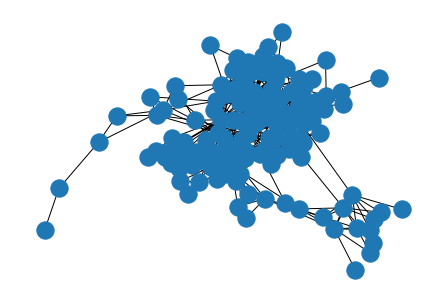

In [4]:
g=nx.read_edgelist('ia-enron-only.edges')
print(nx.info(g))
nx.draw(g)

In [5]:
max([1,2,3,4,5])

5

In [6]:
max(['apple','grabe','carrots'])

'grabe'

In [8]:
max(['apple','grabe','carrots'],key=len)

'carrots'

In [10]:
#Finding the node with max degree
h_degree_node=max(g.nodes,key=g.degree)
h_degree_node

'105'

In [11]:
g.degree(h_degree_node)

42

In [15]:
between = nx.centrality.betweenness_centrality(g)
highest_between_node = max(g.nodes, key=between.get)
highest_between_node

'105'

In [17]:
between[highest_between_node]

0.19400604344556296

In [18]:
max(g.nodes,key=between)

TypeError: 'dict' object is not callable

In [19]:
#2. Centrality distributions
degree_seq=[g.degree(n)for n in g.nodes]

In [20]:
import statistics
print('mean degree:',statistics.mean(degree_seq))
print('median degree:',statistics.median(degree_seq))

mean degree: 8.713286713286713
median degree: 8


In [22]:
betweenness = nx.centrality.betweenness_centrality(g)
betweenness_sequence = list(betweenness.values())

print('Mean betweenness:', statistics.mean(betweenness_sequence))
print('Median betweenness:', statistics.median(betweenness_sequence))

Mean betweenness: 0.013950388838012454
Median betweenness: 0.0037492834763570323


In [25]:
#Plotting the distribution
from collections import Counter
degree_counts=Counter(degree_seq)
degree_counts

Counter({30: 1,
         2: 16,
         17: 5,
         12: 5,
         13: 3,
         16: 5,
         10: 9,
         11: 10,
         18: 3,
         20: 1,
         15: 3,
         19: 2,
         7: 9,
         14: 6,
         9: 16,
         42: 1,
         8: 6,
         5: 8,
         6: 7,
         1: 6,
         4: 11,
         23: 1,
         3: 9})

In [29]:
min_degree,max_degree=min(degree_counts.keys()),max(degree_counts.keys())
plot_x=list( range(min_degree,max_degree+1))

In [30]:
plot_y = [degree_counts.get(x, 0) for x in plot_x]


<BarContainer object of 42 artists>

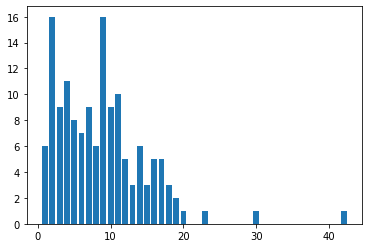

In [31]:
import matplotlib.pyplot as plt

plt.bar(plot_x, plot_y)

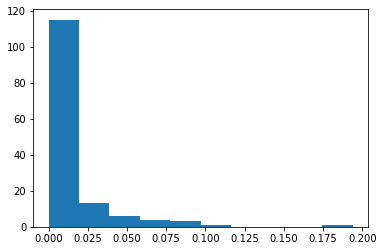

In [32]:
#Histogram binning
counts,bins,patch=plt.hist(betweenness_sequence ,bins=10)

In [33]:
bins

array([0.        , 0.0194006 , 0.03880121, 0.05820181, 0.07760242,
       0.09700302, 0.11640363, 0.13580423, 0.15520483, 0.17460544,
       0.19400604])

In [34]:
counts

array([115.,  13.,   6.,   4.,   3.,   1.,   0.,   0.,   0.,   1.])

In [36]:
#3. Testing robustness
nx.connected_components(g)

<generator object connected_components at 0x000002644CEC20B0>

In [38]:
core = next(nx.connected_components(g))
core

{'1',
 '10',
 '100',
 '101',
 '102',
 '103',
 '104',
 '105',
 '106',
 '107',
 '108',
 '109',
 '11',
 '110',
 '111',
 '112',
 '113',
 '114',
 '115',
 '116',
 '117',
 '118',
 '119',
 '12',
 '120',
 '121',
 '122',
 '123',
 '124',
 '125',
 '126',
 '127',
 '128',
 '129',
 '13',
 '130',
 '131',
 '132',
 '133',
 '134',
 '135',
 '136',
 '137',
 '138',
 '139',
 '14',
 '140',
 '141',
 '142',
 '143',
 '15',
 '16',
 '17',
 '18',
 '19',
 '2',
 '20',
 '21',
 '22',
 '23',
 '24',
 '25',
 '26',
 '27',
 '28',
 '29',
 '3',
 '30',
 '31',
 '32',
 '33',
 '34',
 '35',
 '36',
 '37',
 '38',
 '39',
 '4',
 '40',
 '41',
 '42',
 '43',
 '44',
 '45',
 '46',
 '47',
 '48',
 '49',
 '5',
 '50',
 '51',
 '52',
 '53',
 '54',
 '55',
 '56',
 '57',
 '58',
 '59',
 '6',
 '60',
 '61',
 '62',
 '63',
 '64',
 '65',
 '66',
 '67',
 '68',
 '69',
 '7',
 '70',
 '71',
 '72',
 '73',
 '74',
 '75',
 '76',
 '77',
 '78',
 '79',
 '8',
 '80',
 '81',
 '82',
 '83',
 '84',
 '85',
 '86',
 '87',
 '88',
 '89',
 '9',
 '90',
 '91',
 '92',
 '93',
 '94',

In [39]:
len(core)

143

In [41]:
components=list(nx.connected_components(g))

In [42]:
len(components)

1

In [47]:
#Random failure
c=g.copy()

In [48]:
import random

nodes_to_remove = random.sample(list(c.nodes), 2)
c.remove_nodes_from(nodes_to_remove)

In [50]:
n_of_step=25
m=g.number_of_nodes()
m

143

In [52]:
num_nodes_removed = range(0, g.number_of_nodes(), m)


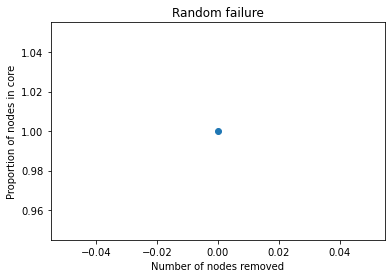

In [56]:
N = g.number_of_nodes()
C = g.copy()
random_attack_core_proportions = []
for nodes_removed in num_nodes_removed:
    core = next(nx.connected_components(C))
    core_proportion = len(core) / N
    random_attack_core_proportions.append(core_proportion)
    
    if C.number_of_nodes() > m:
        nodes_to_remove = random.sample(list(C.nodes), m)
        C.remove_nodes_from(nodes_to_remove)
plt.title('Random failure')
plt.xlabel('Number of nodes removed')
plt.ylabel('Proportion of nodes in core')
plt.plot(num_nodes_removed, random_attack_core_proportions, marker='o')

In [58]:
nodes_sorted_by_degree = sorted(g.nodes, key=g.degree, reverse=True)
top_degree_nodes = nodes_sorted_by_degree[:m]
top_degree_nodes

['105',
 '17',
 '95',
 '48',
 '132',
 '43',
 '31',
 '74',
 '91',
 '72',
 '20',
 '136',
 '124',
 '32',
 '19',
 '67',
 '69',
 '47',
 '50',
 '65',
 '75',
 '118',
 '22',
 '56',
 '37',
 '53',
 '122',
 '60',
 '2',
 '64',
 '123',
 '3',
 '9',
 '101',
 '121',
 '77',
 '29',
 '71',
 '4',
 '13',
 '26',
 '66',
 '51',
 '68',
 '100',
 '142',
 '27',
 '28',
 '16',
 '49',
 '137',
 '115',
 '18',
 '35',
 '125',
 '6',
 '112',
 '139',
 '14',
 '85',
 '107',
 '39',
 '58',
 '104',
 '141',
 '90',
 '99',
 '109',
 '143',
 '130',
 '102',
 '11',
 '24',
 '10',
 '73',
 '41',
 '119',
 '54',
 '78',
 '70',
 '82',
 '111',
 '120',
 '134',
 '117',
 '57',
 '12',
 '21',
 '36',
 '61',
 '76',
 '86',
 '129',
 '7',
 '40',
 '83',
 '126',
 '23',
 '103',
 '94',
 '110',
 '25',
 '55',
 '30',
 '44',
 '45',
 '108',
 '131',
 '79',
 '116',
 '84',
 '106',
 '128',
 '38',
 '33',
 '87',
 '34',
 '59',
 '46',
 '114',
 '127',
 '1',
 '5',
 '8',
 '140',
 '81',
 '89',
 '52',
 '62',
 '135',
 '97',
 '113',
 '133',
 '88',
 '93',
 '96',
 '138',
 '15',

In [59]:
N = g.number_of_nodes()
number_of_steps = 25
M = N // number_of_steps

num_nodes_removed = range(0, N, M)
C = g.copy()
targeted_attack_core_proportions = []
for nodes_removed in num_nodes_removed:
    core = next(nx.connected_components(C))
    core_proportion = len(core) / N
    targeted_attack_core_proportions.append(core_proportion)
    
    if C.number_of_nodes() > M:
        nodes_sorted_by_degree = sorted(C.nodes, key=C.degree, reverse=True)
        nodes_to_remove = nodes_sorted_by_degree[:M]
        C.remove_nodes_from(nodes_to_remove)

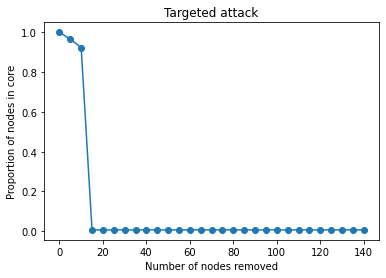

In [60]:
plt.title('Targeted attack')
plt.xlabel('Number of nodes removed')
plt.ylabel('Proportion of nodes in core')
plt.plot(num_nodes_removed, targeted_attack_core_proportions, marker='o')

In [ ]:
plt.title('Random failure vs. targeted attack')
plt.xlabel('Number of nodes removed')
plt.ylabel('Proportion of nodes in core')
plt.plot(num_nodes_removed, random_attack_core_proportions, marker='o', label='Failures')
plt.plot(num_nodes_removed, targeted_attack_core_proportions, marker='^', label='Attacks')
plt.legend()